# **Mission_1 토익 점수 데이터 분석**


## <미션>

최종 차수 점수 변화(Score_diff_total)와 feature들간의 관계를 분석하기 위한 가설 검증 수행
* 전처리 단계에서 생성한 데이터에 대한 탐색적 데이터 분석을 수행해봅시다.
* 개별 변수 및 개별 변수들 간의 관계에 대해 분석합니다.
* [도전 미션] 새로운 변수를 추가하여 데이터에 대한 탐색적 데이터 분석을 수행해봅시다.

## <환경설정>

### &nbsp;&nbsp; 1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 아래 필요한 라이브러리, 함수를 추가하시오.
## 코드 입력
import scipy.stats as spst


### &nbsp;&nbsp; 2) 한글 폰트 설정하기

In [2]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### &nbsp;&nbsp; 3) 데이터 불러오기
    * toeic_preprocessed_data.csv

In [3]:
## 코드 입력
file = 'toeic_preprocessed_data.csv'
base_data = pd.read_csv(file)

<br><br><hr>

## 1. 기본 분석


  - 데이터프레임의 크기를 확인
  - 데이터프레임의 컬럼명과 컬렴별 데이터 개수, 데이터 타입을 확인
  - 데이터프레임 전체에 대한 기초통계량 확인
  - 결측치(NaN) 확인
    * 결측치(NaN)가 존재한다면 적절하게 조치합니다.

#### &nbsp;&nbsp; 1-1) 데이터프레임 크기 확인

In [4]:
## 코드 입력
base_data.shape

(500, 20)

#### &nbsp;&nbsp; 1-2) 컬럼명, 데이터 개수, 데이터 타입 확인

In [5]:
## 코드 입력
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                500 non-null    int64 
 1   Gender            500 non-null    object
 2   Birth_Year        500 non-null    int64 
 3   3rd_LC_Score      500 non-null    int64 
 4   3rd_RC_Score      500 non-null    int64 
 5   3rd_Total_Score   500 non-null    int64 
 6   학습목표              500 non-null    object
 7   학습방법              500 non-null    object
 8   강의 학습 교재 유형       500 non-null    object
 9   학습빈도              500 non-null    object
 10  기출문제 공부 횟수        500 non-null    int64 
 11  취약분야 인지 여부        500 non-null    object
 12  토익 모의테스트 횟수       500 non-null    int64 
 13  1st_LC_Score      500 non-null    int64 
 14  1st_RC_Score      500 non-null    int64 
 15  1st_Total_Score   500 non-null    int64 
 16  2nd_LC_Score      500 non-null    int64 
 17  2nd_RC_Score    

#### &nbsp;&nbsp; 1-3) 기초통계량 확인

In [6]:
## 코드 입력
base_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,500.0,250.500,144.481833,1.0,125.75,250.5,375.25,500.0
Birth_Year,500.0,1992.906,8.224381,1973.0,1986.75,1992.5,2000.00,2007.0
3rd_LC_Score,500.0,368.240,82.135393,141.0,295.00,372.5,434.25,495.0
3rd_RC_Score,500.0,369.518,81.665858,135.0,295.00,375.0,437.25,495.0
3rd_Total_Score,500.0,737.798,155.901584,280.0,591.75,760.5,860.25,990.0
기출문제 공부 횟수,500.0,5.098,2.779901,1.0,3.00,5.0,7.00,10.0
토익 모의테스트 횟수,500.0,9.460,4.955554,1.0,5.00,8.0,13.25,20.0
1st_LC_Score,500.0,313.878,85.555611,105.0,259.75,308.0,369.25,495.0
1st_RC_Score,500.0,312.822,86.574966,84.0,250.00,311.5,377.25,491.0
1st_Total_Score,500.0,626.700,148.571710,250.0,519.00,642.0,735.00,970.0


#### &nbsp;&nbsp; 1-4) 결측치(N/A) 개수 확인

In [7]:
## isna
## 코드 입력
base_data.isna().sum()

ID                  0
Gender              0
Birth_Year          0
3rd_LC_Score        0
3rd_RC_Score        0
3rd_Total_Score     0
학습목표                0
학습방법                0
강의 학습 교재 유형         0
학습빈도                0
기출문제 공부 횟수          0
취약분야 인지 여부          0
토익 모의테스트 횟수         0
1st_LC_Score        0
1st_RC_Score        0
1st_Total_Score     0
2nd_LC_Score        0
2nd_RC_Score        0
2nd_Total_Score     0
Score_diff_total    0
dtype: int64

<br><br><hr>

## 2. 단변량 분석


- 주요 변수들의 분포를 살펴보며 비즈니스를 파악합시다.
- 단일 변수로 분석
    * 숫자형 변수 : 기초통계량, 히스토그램, kdeplot, 박스플롯
    * 범주형 변수 : 범주별 빈도수, 바 플롯

#### &nbsp;&nbsp; 2-1) 최종 차수 점수 변화(Score_diff_total)

,count,mean,std,min,25%,50%,75%,max
Score_diff_total,500.0,61.514,39.739051,0.0,30.0,63.0,83.0,281.0


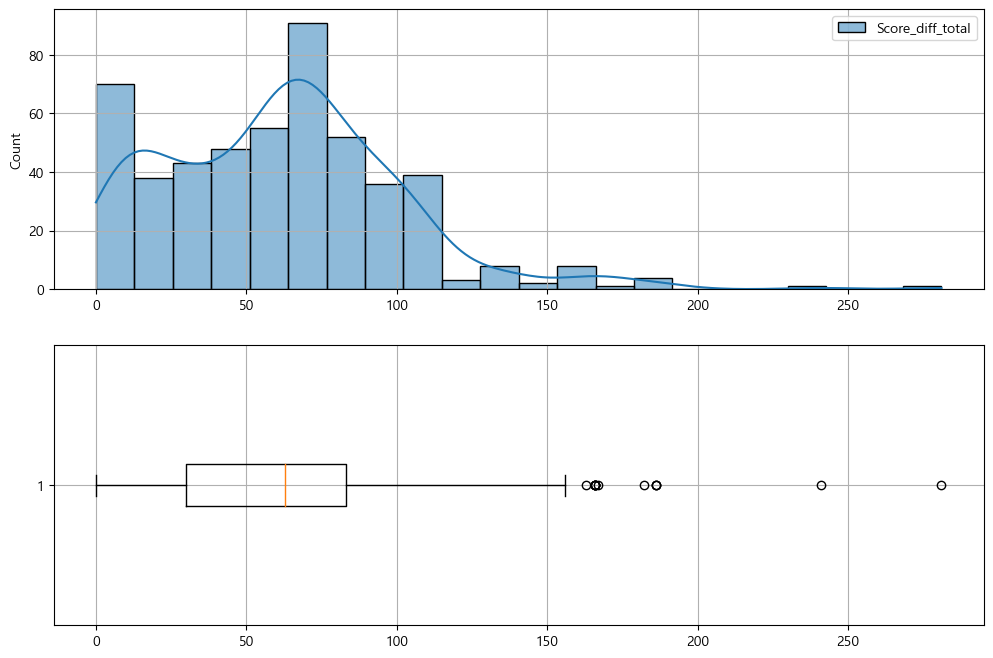

In [16]:
## 'Score_diff_total' 변수의 기초통계량 확인
## 코드 입력
display(base_data[['Score_diff_total']].describe().T)

plt.figure(figsize = (12,8))
plt.subplot(2,1,1)

## 'Score_diff_total' 변수의 histplot그리기
## 코드 입력
sns.histplot(base_data[['Score_diff_total']], kde=True)

plt.grid()

plt.subplot(2,1,2)

## 'Score_diff_total' 변수의 boxplot 그리기
## 코드 입력
plt.boxplot(base_data[['Score_diff_total']], vert=False)

plt.grid()

plt.show()



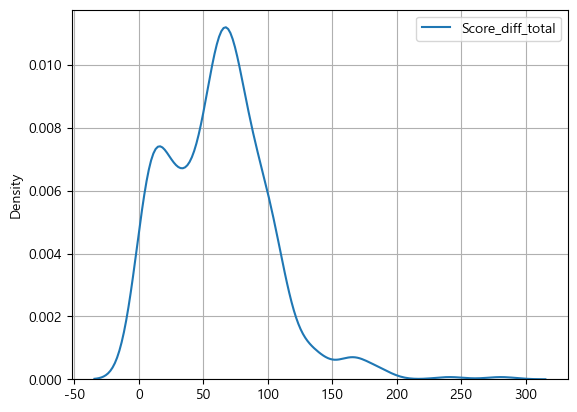

In [12]:
## 'Score_diff_total' 변수의 kdeplot 그리기
## 코드 입력
sns.kdeplot(base_data[['Score_diff_total']])

plt.grid()

plt.show()

#### &nbsp;&nbsp; 2-2) 범주형 변수
   * 분석 방법 : 범주별 빈도수, countplot
   * 대상 변수 : Gender, 학습목표, 학습방법, 강의 학습 교재 유형, 학습빈도, 취약분야 인지 여부

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-1) 'Gender'

Gender
F         250
M         250
dtype: int64

Gender
F         0.5
M         0.5
dtype: float64

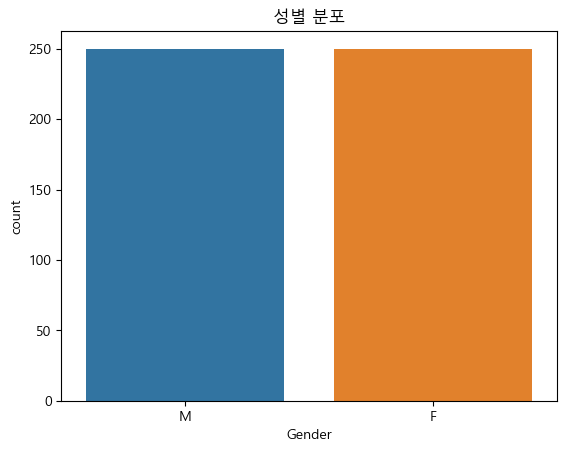

In [24]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력
display(base_data[['Gender']].value_counts())

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력
display(base_data[['Gender']].value_counts() / len(base_data))

## 그래프 분석하기 : countplot()
## 코드 입력
sns.countplot(x = base_data['Gender'])
plt.title('성별 분포')
plt.show()


##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-2) 학습목표

학습목표
자기계발    329
승진      155
취업       16
dtype: int64

학습목표
자기계발    0.658
승진      0.310
취업      0.032
dtype: float64

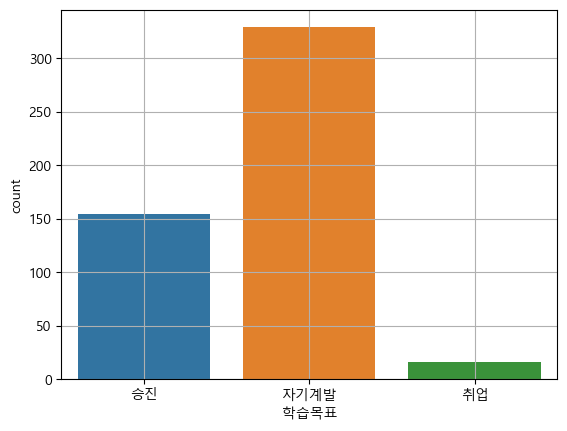

In [25]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력
display(base_data[['학습목표']].value_counts())

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력
display(base_data[['학습목표']].value_counts() / len(base_data))

## 그래프 분석하기 : countplot()
## 코드 입력
sns.countplot(x = base_data['학습목표'])
plt.grid()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-3) 학습방법

학습방법  
온라인강의     208
오프라인강의    162
참고서       130
dtype: int64

학습목표
자기계발    0.658
승진      0.310
취업      0.032
dtype: float64

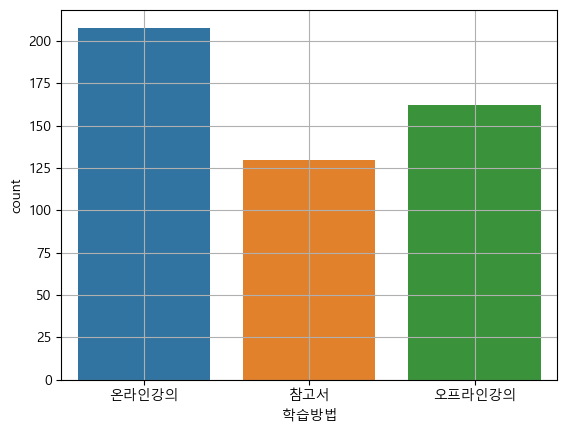

In [26]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력
display(base_data[['학습방법']].value_counts())

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력
display(base_data[['학습목표']].value_counts() / len(base_data))

## 그래프 분석하기 : countplot()
## 코드 입력
sns.countplot(x = base_data['학습방법'])
plt.grid()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-4) 강의 학습 교재 유형 

강의 학습 교재 유형          
일반적인 영어 텍스트 기반 교재        136
영상 교재                    128
뉴스/이슈 기반 교재              122
비즈니스 시뮬레이션(Role Play)    114
dtype: int64

강의 학습 교재 유형          
일반적인 영어 텍스트 기반 교재        0.272
영상 교재                    0.256
뉴스/이슈 기반 교재              0.244
비즈니스 시뮬레이션(Role Play)    0.228
dtype: float64

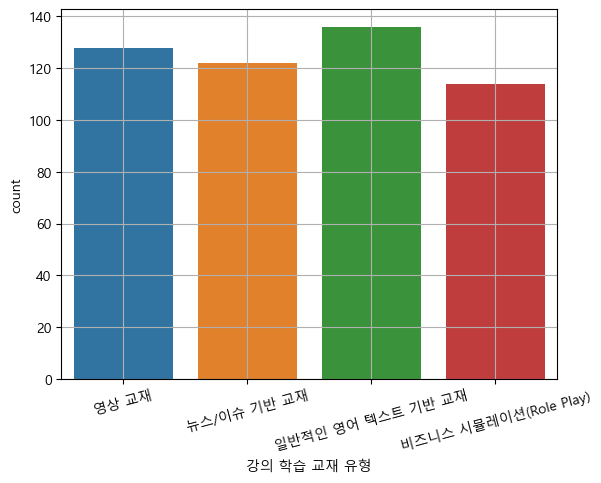

In [31]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력
display(base_data[['강의 학습 교재 유형']].value_counts())

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력
display(base_data[['강의 학습 교재 유형']].value_counts() / len(base_data))

## 그래프 분석하기 : countplot()
## 코드 입력
sns.countplot(x = base_data['강의 학습 교재 유형'])
plt.xticks(rotation = 15)
plt.grid()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-5) 학습빈도 

학습빈도    
주3-4회       151
주5-6회       127
주1-2회       124
매일(주 7회)     98
dtype: int64

학습빈도    
주3-4회       0.302
주5-6회       0.254
주1-2회       0.248
매일(주 7회)    0.196
dtype: float64

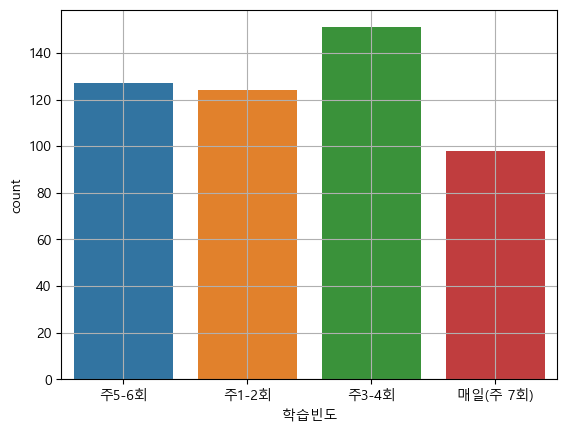

In [32]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력
display(base_data[['학습빈도']].value_counts())

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력
display(base_data[['학습빈도']].value_counts() / len(base_data))

## 그래프 분석하기 : countplot()
## 코드 입력
sns.countplot(x = base_data['학습빈도'])
plt.grid()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-6) 취약분야 인지 여부

취약분야 인지 여부
알고 있음         461
알고 있지 않음       39
dtype: int64

취약분야 인지 여부
알고 있음         0.922
알고 있지 않음      0.078
dtype: float64

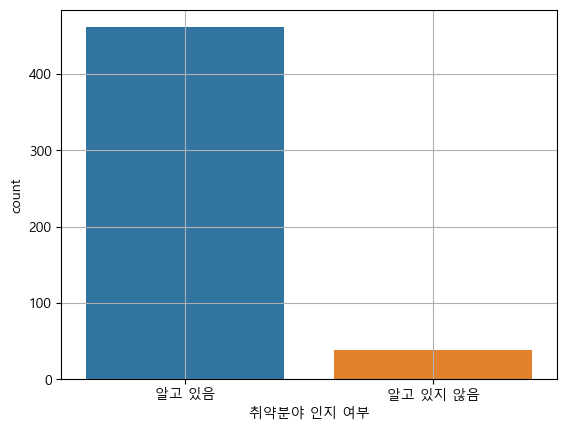

In [33]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력
display(base_data[['취약분야 인지 여부']].value_counts())

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력
display(base_data[['취약분야 인지 여부']].value_counts() / len(base_data))

## 그래프 분석하기 : countplot()
## 코드 입력
sns.countplot(x = base_data['취약분야 인지 여부'])
plt.grid()
plt.show()

#### &nbsp;&nbsp; 2-3) 수치형 변수
   * 분석 방법 : 기초 통계, 히스토그램, boxplot
   * 대상 변수 : 'Birth_Year', '기출문제 공부 횟수','토익 모의테스트 횟수',  '1st_Total_Score', '2st_Total_Score'
             

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-1) Bitrh_Year

,count,mean,std,min,25%,50%,75%,max
Birth_Year,500.0,1992.906,8.224381,1973.0,1986.75,1992.5,2000.0,2007.0


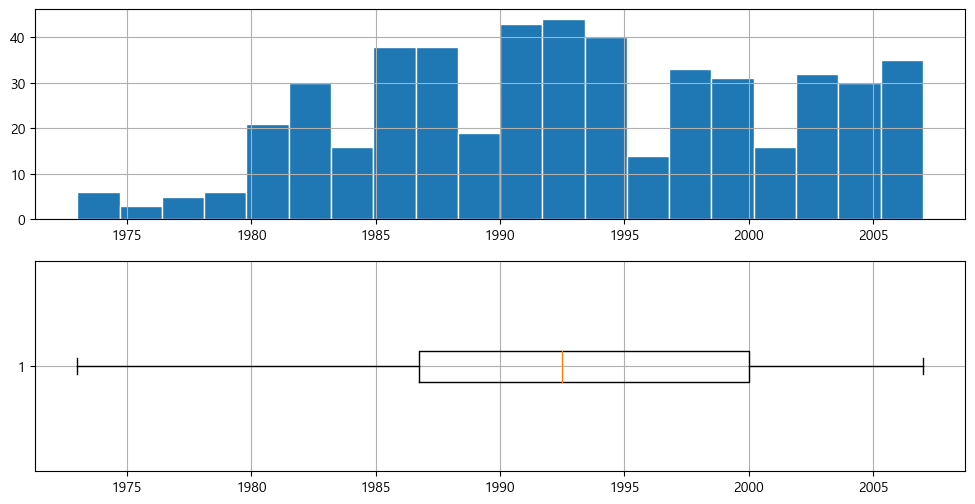

In [39]:
## 수치형 변수의 기초 통계량 확인 : describe
## 코드 입력
display(base_data[['Birth_Year']].describe().T)
## 그래프 분석 : histplot, boxplot
## 코드 입력
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.hist(base_data[['Birth_Year']], bins=20, edgecolor='w')
plt.grid()

plt.subplot(2,1,2)
plt.boxplot(base_data[['Birth_Year']], vert=False)
plt.grid()

plt.show()


##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-2) 기출문제 공부 횟수

,count,mean,std,min,25%,50%,75%,max
기출문제 공부 횟수,500.0,5.098,2.779901,1.0,3.0,5.0,7.0,10.0


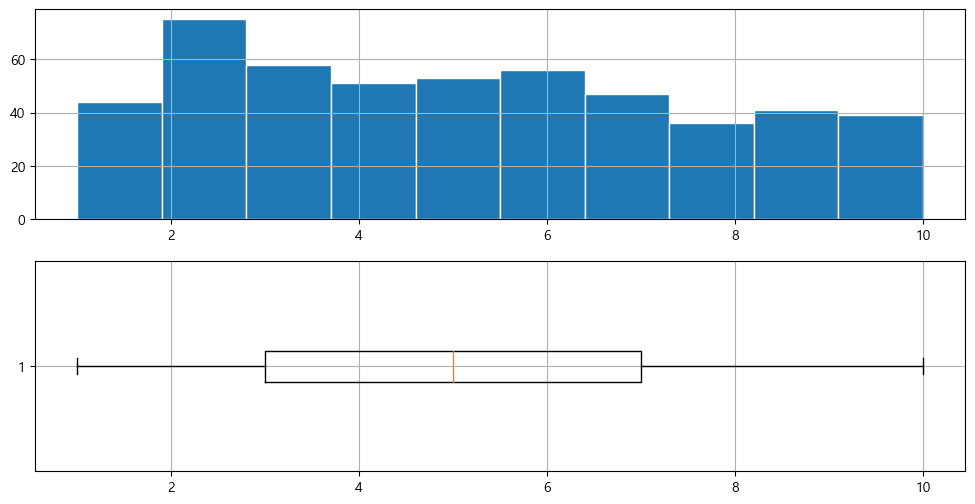

In [41]:
## 수치형 변수의 기초 통계량 확인 : describe
## 코드 입력
display(base_data[['기출문제 공부 횟수']].describe().T)
## 그래프 분석 : histplot, boxplot
## 코드 입력
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.hist(base_data[['기출문제 공부 횟수']], bins=10, edgecolor='w')
plt.grid()

plt.subplot(2,1,2)
plt.boxplot(base_data[['기출문제 공부 횟수']], vert=False)
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-3) 토익 모의테스트 횟수

,count,mean,std,min,25%,50%,75%,max
토익 모의테스트 횟수,500.0,9.46,4.955554,1.0,5.0,8.0,13.25,20.0


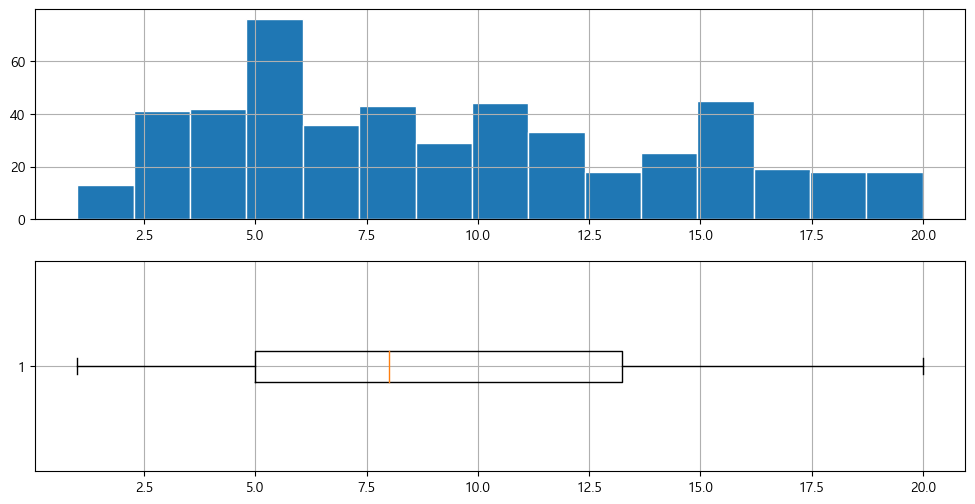

In [43]:
## 수치형 변수의 기초 통계량 확인 : describe
## 코드 입력
display(base_data[['토익 모의테스트 횟수']].describe().T)
## 그래프 분석 : histplot, boxplot
## 코드 입력
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.hist(base_data[['토익 모의테스트 횟수']], bins=15, edgecolor='w')
plt.grid()

plt.subplot(2,1,2)
plt.boxplot(base_data[['토익 모의테스트 횟수']], vert=False)
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-4) 1st_Total_Score

,count,mean,std,min,25%,50%,75%,max
1st_Total_Score,500.0,626.7,148.57171,250.0,519.0,642.0,735.0,970.0


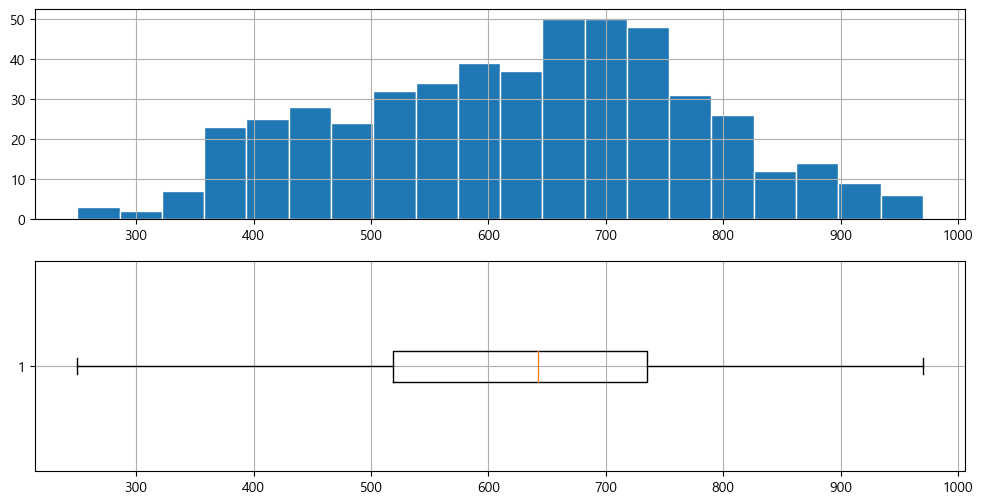

In [44]:
## 수치형 변수의 기초 통계량 확인 : describe
## 코드 입력
display(base_data[['1st_Total_Score']].describe().T)
## 그래프 분석 : histplot, boxplot
## 코드 입력
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.hist(base_data[['1st_Total_Score']], bins=20, edgecolor='w')
plt.grid()

plt.subplot(2,1,2)
plt.boxplot(base_data[['1st_Total_Score']], vert=False)
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-5) 2nd_Total_Score

,count,mean,std,min,25%,50%,75%,max
2nd_Total_Score,500.0,676.284,153.178624,260.0,557.75,691.0,790.5,990.0


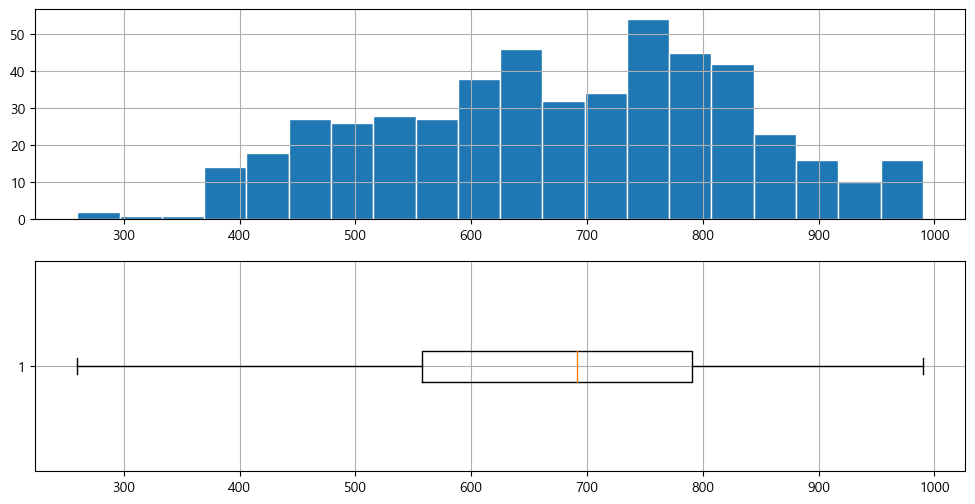

In [45]:
## 수치형 변수의 기초 통계량 확인 : describe
## 코드 입력
display(base_data[['2nd_Total_Score']].describe().T)
## 그래프 분석 : histplot, boxplot
## 코드 입력
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.hist(base_data[['2nd_Total_Score']], bins=20, edgecolor='w')
plt.grid()

plt.subplot(2,1,2)
plt.boxplot(base_data[['2nd_Total_Score']], vert=False)
plt.grid()

plt.show()

## [정리] 단변량 분석을 통해 파악된 비즈니스 인사이트는 무엇인가요?

In [ ]:
# 자기계발을 목적으로 하는 사람이 많음
# 온라인 강의로 공부하는 사람이 많음
# 600 ~ 800 점 사이에 분포가 많이 되어있음
# 기출문제 공부 보다는 모의고사 응시를 선호하는 경향이 있음 

<br><br><hr><br><br>

## 3. 이변량 분석

- 수치형 feature --> 수치형 target
    - 전체 변수들 간의 상관관계 구하기
        * 범주형 변수를 제외한 데이터셋을 이용하여
        * .corr() + sns.heatmap() 으로 전체 상관계수를 시각화
    - 상관계수 상위 몇개에 대해서 feature와 target에 대해 
        * 상관분석을 통해 상관계수가 유의미함을 분석
        * 산점도를 통해 상관관계를 시각화하여 분석
- 범주형 feature --> 수치형 target
    * 범주간에 target의 평균의 차이가 있는지 분석
    * 범주별 barplot으로 평균의 차이를 시각화하여 분석

#### &nbsp;&nbsp; 3-1) 수치형 feature --> 수치형 target


##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-1) 전체 수치형 변수들 간의 상관관계 분석

* 수치형 변수 리스트 만들기

In [46]:
# 수치형 변수 리스트 정의

col_num = ['Birth_Year','3rd_LC_Score','3rd_RC_Score','3rd_Total_Score', '기출문제 공부 횟수','토익 모의테스트 횟수', '1st_LC_Score', '1st_RC_Score', '1st_Total_Score',
            '2nd_LC_Score', '2nd_RC_Score', '2nd_Total_Score', 'Score_diff_total']

In [47]:
## 수치형 변수들의 데이터 확인

base_data[col_num]

,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,기출문제 공부 횟수,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total
0,1973,345,336,681,7,10,181,173,354,227,213,440,241
1,1982,380,368,748,4,14,330,290,620,354,339,693,55
2,1995,416,382,798,4,4,367,309,676,396,365,761,37
3,1987,495,397,892,9,8,470,285,755,495,341,836,56
4,1994,398,437,835,6,4,273,372,645,314,426,740,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2006,364,336,700,10,13,347,315,662,349,321,670,30
496,1988,187,252,439,9,17,112,250,362,120,251,371,68
497,2006,255,167,422,2,4,252,150,402,254,158,412,10
498,1990,422,370,792,4,7,371,324,695,378,326,704,88


* 숫자형 데이터의 상호 상관관계

In [52]:
## 데이터 프레임의 상관계수 도출하기 : corr
## 코드 입력
base_data[col_num].corr()

,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,기출문제 공부 횟수,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total
Birth_Year,1.000000,0.034871,0.027302,0.032645,0.000754,-0.010049,0.065178,0.051614,0.067610,0.058882,0.060268,0.065340,-0.123791
3rd_LC_Score,0.034871,1.000000,0.810450,0.951776,0.042070,0.009477,0.892739,0.641789,0.888068,0.951131,0.725373,0.919824,0.188377
3rd_RC_Score,0.027302,0.810450,1.000000,0.951058,0.035350,0.012057,0.651576,0.892840,0.895484,0.729434,0.948760,0.920256,0.183897
3rd_Total_Score,0.032645,0.951776,0.951058,1.000000,0.040950,0.011285,0.812176,0.806150,0.937450,0.883673,0.879439,0.967091,0.195372
기출문제 공부 횟수,0.000754,0.042070,0.035350,0.040950,1.000000,0.822999,-0.001871,-0.010960,-0.007464,-0.013591,-0.012960,-0.014495,0.216523
토익 모의테스트 횟수,-0.010049,0.009477,0.012057,0.011285,0.822999,1.000000,-0.020741,-0.035071,-0.032380,-0.033481,-0.025364,-0.032288,0.168731
1st_LC_Score,0.065178,0.892739,0.651576,0.812176,-0.001871,-0.020741,1.000000,0.489982,0.861374,0.951472,0.569375,0.834647,-0.030968
1st_RC_Score,0.051614,0.641789,0.892840,0.806150,-0.010960,-0.035071,0.489982,1.000000,0.864873,0.568388,0.956994,0.836292,-0.060947
1st_Total_Score,0.067610,0.888068,0.895484,0.937450,-0.007464,-0.032380,0.861374,0.864873,1.000000,0.879117,0.885532,0.967955,-0.053348
2nd_LC_Score,0.058882,0.951131,0.729434,0.883673,-0.013591,-0.033481,0.951472,0.568388,0.879117,1.000000,0.661840,0.911918,-0.048322


* 상관계수 시각화 

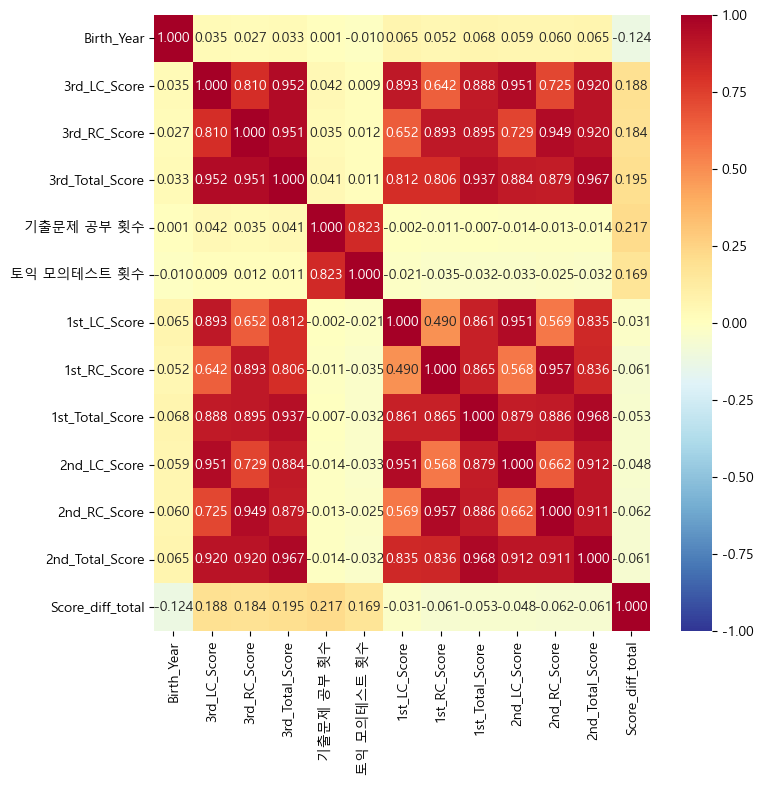

In [58]:
## 상관계수값을 heatmap을 이용하여 시각화 : heatmap
## 코드 입력
plt.figure(figsize = (8, 8))
sns.heatmap(base_data[col_num].corr(),
            annot = True,       
            fmt = '.3f',
            cmap = 'RdYlBu_r',    
            vmin = -1, vmax = 1)     
plt.show()

### target과 상관계수 상위 3개 살펴보기

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-2) 기출문제 공부 횟수

In [102]:
## 가설 수립
## 귀무 가설(H0) : 기출문제 공부 횟수가 점수 상승과 상관이 있다
## 대립 가설(H1) : 기출문제 공부 횟수가 점수 상승과 상관이 없다

In [60]:
# 상관분석 (pearsonr)
## 코드 입력
target = 'Score_diff_total'
feature = '기출문제 공부 횟수'
spst.pearsonr(base_data[feature], base_data[target])

PearsonRResult(statistic=0.21652328806766585, pvalue=1.020785279200108e-06)

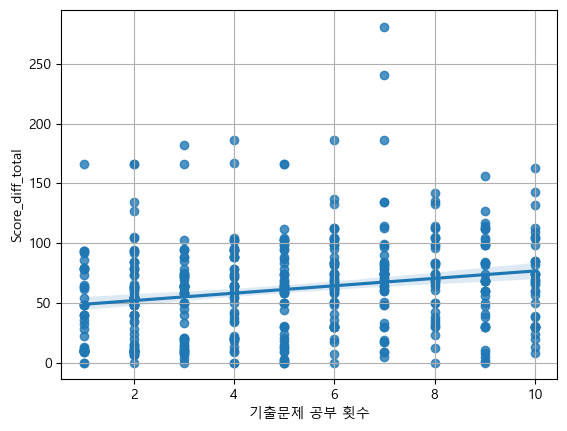

In [62]:
# regplot으로 시각화
## 코드 입력
sns.regplot( x= feature, y = target, data = base_data)
plt.grid()
plt.show()


##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-3) 토익 모의테스트 횟수

In [105]:
## 가설 수립
## 귀무 가설(H0) : 토익 모의테스트 횟수가 점수 상승과 상관이 있다
## 대립 가설(H1) : 토익 모의테스트 횟수가 점수 상승과 상관이 없다

In [63]:
## 상관분석 (pearsonr)
## 코드 입력
target = 'Score_diff_total'
feature = '토익 모의테스트 횟수'
spst.pearsonr(base_data[feature], base_data[target])

PearsonRResult(statistic=0.16873093322890687, pvalue=0.00015021865019138392)

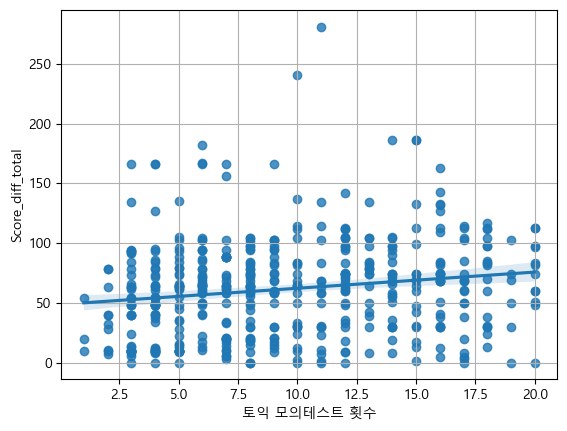

In [64]:
## regplot으로 시각화
## 코드 입력
sns.regplot( x= feature, y = target, data = base_data)
plt.grid()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-4) 2차 종합점수

In [108]:
## 가설 수립
## 귀무 가설(H0) : 2차 종합점수가 점수 상승과 상관이 있다
## 대립 가설(H1) : 2차 종합점수가 점수 상승과 상관이 없다


In [66]:
## 상관분석 (pearsonr)
## 코드 입력
target = 'Score_diff_total'
feature = '2nd_Total_Score'
spst.pearsonr(base_data[feature], base_data[target])

PearsonRResult(statistic=-0.06058469921846522, pvalue=0.17619398209815046)

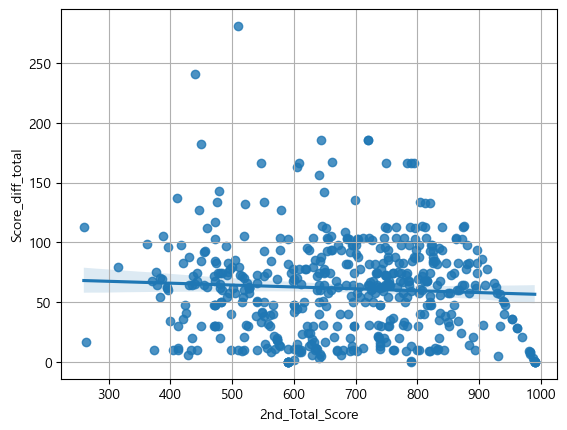

In [67]:
## regplot으로 시각화
## 코드 입력
sns.regplot( x= feature, y = target, data = base_data)
plt.grid()
plt.show()

#### &nbsp;&nbsp; 3-2) 범주형 feature -> 수치형 target



In [111]:
## 범주형 feature

## 'Gender', '학습목표', '학습방법', '강의 학습 교재 유형', '학습빈도', '취약분야 인지 여부', 'age_group', 

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-1) Gender 

In [112]:
## 가설 수립
## 귀무 가설(H0) : Gender가 점수 상승과 상관이 있다
## 대립 가설(H1) : Gender가 점수 상승과 상관이 없다

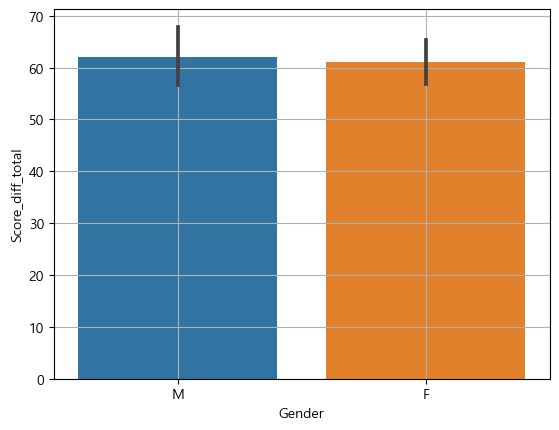

In [68]:
## 그래프 분석 : barplot
## 코드 입력
target = 'Score_diff_total'
feature = 'Gender'
sns.barplot(x = feature, y = target, data = base_data)
plt.grid()
plt.show()

In [69]:
## 범주 데이터 확인 : value_counts()
## 코드 입력
base_data[[feature]].value_counts()

Gender
F         250
M         250
dtype: int64

In [70]:
## 평균 분석 : ttest_ind
## 코드 입력
male = base_data.loc[base_data[feature]=='M', target]
female = base_data.loc[base_data[feature]=='F', target]

spst.ttest_ind(male, female)

Ttest_indResult(statistic=0.2822086676965537, pvalue=0.7779007564857058)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-2) 학습목표

In [116]:
## 가설 수립
## 귀무 가설(H0) : 학습 목표가 점수 상승과 상관이 있다
## 대립 가설(H1) : 학습 목표가 점수 상승과 상관이 없다

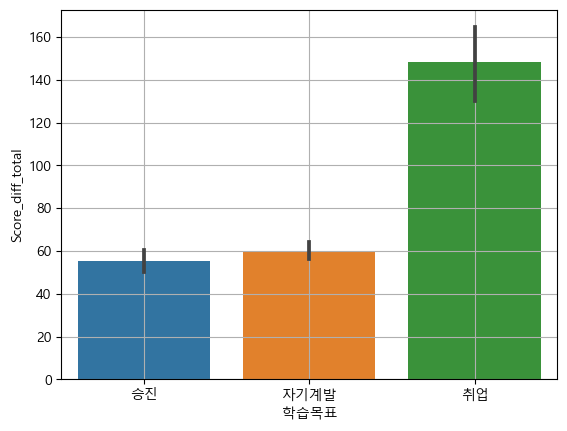

In [97]:
# 그래프 분석 : barplot
## 코드 입력
target = 'Score_diff_total'
feature = '학습목표'
sns.barplot(x = feature, y = target, data = base_data)
plt.grid()
plt.show()


In [72]:
## 범주 데이터 확인 : value_counts()
## 코드 입력
base_data[[feature]].value_counts()

학습목표
자기계발    329
승진      155
취업       16
dtype: int64

In [98]:
## 분산 분석 : f_oneway
## 코드 입력
d1 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[0], target]
d2 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[1], target]
d3 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[2], target]

spst.f_oneway(d1, d2, d3)

F_onewayResult(statistic=47.67396089358833, pvalue=1.1460686383036893e-19)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-3) 학습방법 

In [120]:
## 가설 수립
## 귀무 가설(H0) : 학습방법이 점수 상승과 상관이 있다
## 대립 가설(H1) : 학습방법이 점수 상승과 상관이 없다

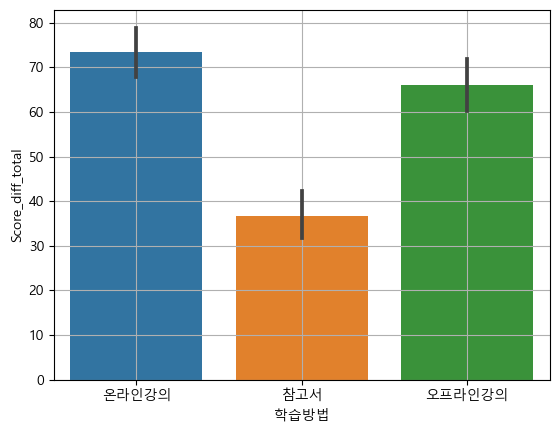

In [94]:
## 그래프 분석 : barplot
## 코드 입력
target = 'Score_diff_total'
feature = '학습방법'
sns.barplot(x = feature, y = target, data = base_data)
plt.grid()
plt.show()

In [76]:
## 범주 데이터 확인 : value_counts()
## 코드 입력
base_data[[feature]].value_counts()

학습방법  
온라인강의     208
오프라인강의    162
참고서       130
dtype: int64

In [96]:
## 분산 분석 : f_oneway
## 코드 입력
d1 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[0], target]
d2 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[1], target]
d3 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[2], target]

spst.f_oneway(d1, d2, d3)

F_onewayResult(statistic=41.419201452370245, pvalue=2.3055747160060528e-17)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-4) 강의 학습 교재 유형

In [124]:
## 가설 수립
## 귀무 가설(H0) : 강의 학습 교재 유형이 점수 상승과 상관이 있다
## 대립 가설(H1) : 강의 학습 교재 유형이 점수 상승과 상관이 없다

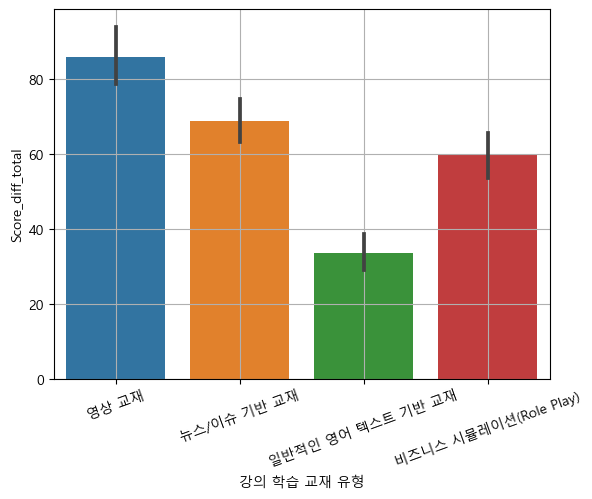

In [79]:
## 그래프 분석 : barplot
## 코드 입력
target = 'Score_diff_total'
feature = '강의 학습 교재 유형'
sns.barplot(x = feature, y = target, data = base_data)
plt.grid()
plt.xticks(rotation = 20)
plt.show()


In [90]:
## 범주 데이터 확인 : value_counts()
## 코드 입력
base_data[feature].value_counts()

일반적인 영어 텍스트 기반 교재        136
영상 교재                    128
뉴스/이슈 기반 교재              122
비즈니스 시뮬레이션(Role Play)    114
Name: 강의 학습 교재 유형, dtype: int64

In [91]:
## 분산 분석 : f_oneway
## 코드 입력
d1 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[0], target]
d2 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[1], target]
d3 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[2], target]
d4 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[3], target]

spst.f_oneway(d1, d2, d3, d4)

F_onewayResult(statistic=52.47853679755316, pvalue=1.7913087495809398e-29)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-5) 학습빈도

In [128]:
## 가설 수립
## 귀무 가설(H0) : 학습빈도가 점수 상승과 상관이 있다
## 대립 가설(H1) : 학습빈도가 점수 상승과 상관이 없다

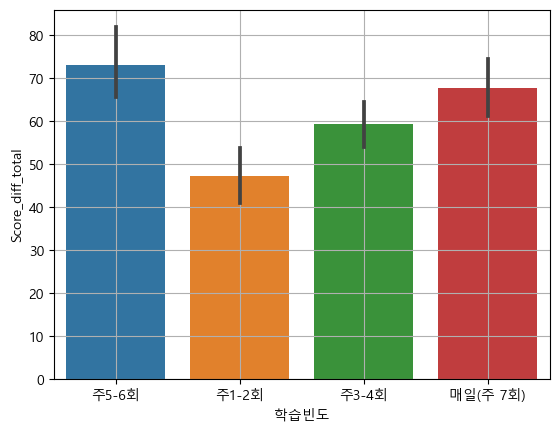

In [99]:
## 그래프 분석 : barplot
## 코드 입력
target = 'Score_diff_total'
feature = '학습빈도'
sns.barplot(x = feature, y = target, data = base_data)
plt.grid()
plt.show()


In [100]:
## 범주 데이터 확인 : value_counts()
## 코드 입력
base_data[[feature]].value_counts()

학습빈도    
주3-4회       151
주5-6회       127
주1-2회       124
매일(주 7회)     98
dtype: int64

In [101]:
## 분산 분석 : f_oneway
## 코드 입력
d1 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[0], target]
d2 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[1], target]
d3 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[2], target]
d4 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[3], target]

spst.f_oneway(d1, d2, d3, d4)

F_onewayResult(statistic=10.462186683951074, pvalue=1.1022320109042592e-06)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-6) 취약분야 인지 여부

In [132]:
## 가설 수립
## 귀무 가설(H0) : 취약분야 인지 여부가 점수 상승과 상관이 있다
## 대립 가설(H1) : 취약분야 인지 여부가 점수 상승과 상관이 없다

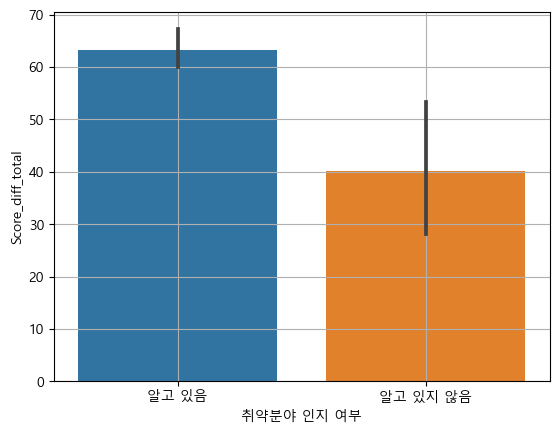

In [102]:
## 그래프 분석 : barplot
## 코드 입력

target = 'Score_diff_total'
feature = '취약분야 인지 여부'
sns.barplot(x = feature, y = target, data = base_data)
plt.grid()
plt.show()

In [103]:
## 범주 데이터 확인 : value_counts()
## 코드 입력
base_data[[feature]].value_counts()

취약분야 인지 여부
알고 있음         461
알고 있지 않음       39
dtype: int64

In [105]:
## 평균 분석 : ttest_ind
## 코드 입력
yes = base_data.loc[base_data[feature]=='알고 있음', target]
no = base_data.loc[base_data[feature]=='알고 있지 않음', target]

spst.ttest_ind(yes, no)

Ttest_indResult(statistic=3.5228688483686006, pvalue=0.00046620434773948446)

## [정리] 이변량 분석을 통해 파악된 비즈니스 인사이트는 무엇인가요?

In [ ]:
# 기출문제와 모의테스트 공부 횟수가 많은 사람들이 점수 상승 확률이 높음
# 취업을 목표로 하는 사람들이 점수 상승 확률이 높음

<br><br><hr><br><br>

## <font color="orange">**4. 도전 미션** </font>

#### &nbsp;&nbsp; 4-1)  나이, 나이대 정보 추가 및 데이터 분석

  - 생년월일을 나이로 변경하여 **열(age)**을 추가하세요.
  - 나이로 변경한 열을 아래의 예시를 참고하여 연령대로 구분하여 **열(age group)**을 추가하세요.
    - 연령 구분 예시 : 20세 이하, 21세-25세, 26세-30세, 31세-35세, 36세-40세, 41세-45세, 46세-50세, 50세 이상
  - 나이, 나이대 데이터 특성에 맞는 단변량, 이변량 분석을 하세요.

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-1) 나이(age) 열 추가

In [128]:
# 라이브러리 불러오기
from datetime import date

# 현재 날짜 구하기
## 코드 입력
now = date.today().year

# 데이터프레임에서 Birth_Year 열의 값으로부터 현재 날짜(2023년도) 기준 나이 계산 
# 'age'열에 값 추가하기
## 코드 입력
base_data['age'] = now - base_data['Birth_Year']
# 확인
## 코드 입력
base_data.head()

,ID,Gender,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,...,취약분야 인지 여부,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total,age
0,1,M,1973,345,336,681,승진,온라인강의,영상 교재,주5-6회,...,알고 있음,10,181,173,354,227,213,440,241,50
1,2,F,1982,380,368,748,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,...,알고 있음,14,330,290,620,354,339,693,55,41
2,3,F,1995,416,382,798,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주1-2회,...,알고 있음,4,367,309,676,396,365,761,37,28
3,4,M,1987,495,397,892,승진,온라인강의,뉴스/이슈 기반 교재,주3-4회,...,알고 있음,8,470,285,755,495,341,836,56,36
4,5,M,1994,398,437,835,자기계발,온라인강의,영상 교재,주3-4회,...,알고 있음,4,273,372,645,314,426,740,95,29


##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-2) 나이(age) 단변량 분석

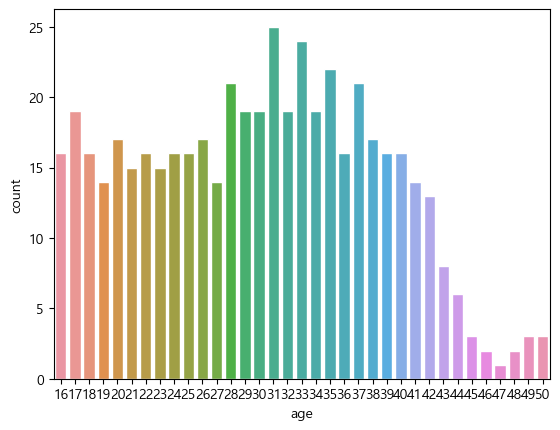

In [131]:
# age 데이터의 기초 통계량 확인
## 코드 입력
base_data[['age']].describe().T

# age 데이터 분포 시각화 확인
## 코드 입력
sns.countplot(x = 'age', data = base_data, edgecolor = 'w')
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-3) 나이대(age_group) 열 추가

In [133]:
## cut() 함수를 활용하여 나이 연령대 계산

## 각 나이 연령대 구간의 경계(bins) 정의
## 코드 입력
bins = [-np.inf, 19, 29, 39, 49, np.inf]

## labels: 각 구간에 붙일 라벨
## 코드 입력
labels = ['10대 이하', '20대', '30대', '40대', '50대 이상']

## cut 함수 사용
## 코드 입력
base_data['age_group'] = pd.cut(base_data['age'],bins=bins,labels=labels)

## 데이터 확인
base_data

,ID,Gender,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,...,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total,age,age_group
0,1,M,1973,345,336,681,승진,온라인강의,영상 교재,주5-6회,...,10,181,173,354,227,213,440,241,50,50대 이상
1,2,F,1982,380,368,748,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,...,14,330,290,620,354,339,693,55,41,40대
2,3,F,1995,416,382,798,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주1-2회,...,4,367,309,676,396,365,761,37,28,20대
3,4,M,1987,495,397,892,승진,온라인강의,뉴스/이슈 기반 교재,주3-4회,...,8,470,285,755,495,341,836,56,36,30대
4,5,M,1994,398,437,835,자기계발,온라인강의,영상 교재,주3-4회,...,4,273,372,645,314,426,740,95,29,20대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,M,2006,364,336,700,자기계발,온라인강의,일반적인 영어 텍스트 기반 교재,매일(주 7회),...,13,347,315,662,349,321,670,30,17,10대 이하
496,497,F,1988,187,252,439,승진,온라인강의,비즈니스 시뮬레이션(Role Play),매일(주 7회),...,17,112,250,362,120,251,371,68,35,30대
497,498,M,2006,255,167,422,자기계발,오프라인강의,일반적인 영어 텍스트 기반 교재,주1-2회,...,4,252,150,402,254,158,412,10,17,10대 이하
498,499,F,1990,422,370,792,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주3-4회,...,7,371,324,695,378,326,704,88,33,30대


##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-4) 나이대(age_group) 단변량 분석

30대       198
20대       166
40대        68
10대 이하     65
50대 이상      3
Name: age_group, dtype: int64

30대       0.396
20대       0.332
40대       0.136
10대 이하    0.130
50대 이상    0.006
Name: age_group, dtype: float64

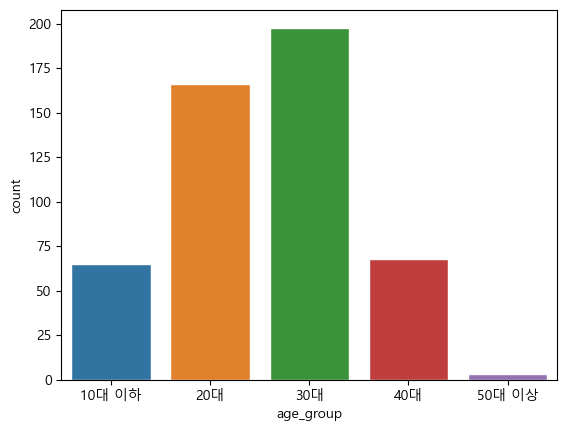

In [134]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력
display(base_data['age_group'].value_counts())

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력
display(base_data['age_group'].value_counts() / len(base_data))

# age_group 기준으로 데이터 분포 시각화 확인 : countplot()
## 코드 입력
sns.countplot(x = base_data['age_group'], edgecolor = 'w')
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-5) 나이(age) -> Target 이변량 분석

In [140]:
## 가설 수립
## 귀무 가설(H0) : 나이는 점수 상승과 상관이 있다
## 대립 가설(H1) : 나이는 점수 상승과 상관이 없다

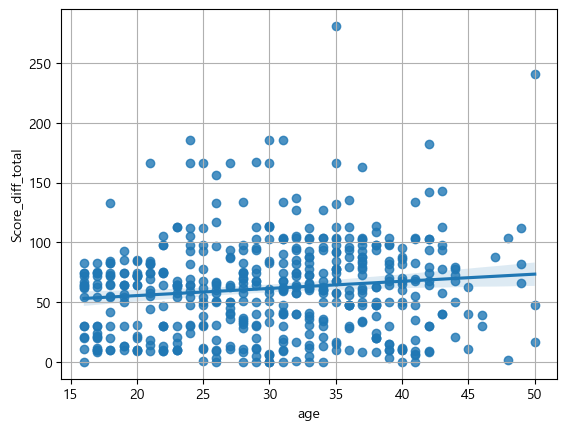

In [135]:
## 상관분석 (pearsonr)
## 코드 입력
spst.pearsonr(base_data['age'], base_data[target])

## regplot으로 시각화
## 코드 입력
sns.regplot(x = 'age', y = 'Score_diff_total', data = base_data)
plt.grid()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-6) 나이대(age_group) -> Target 이변량 분석

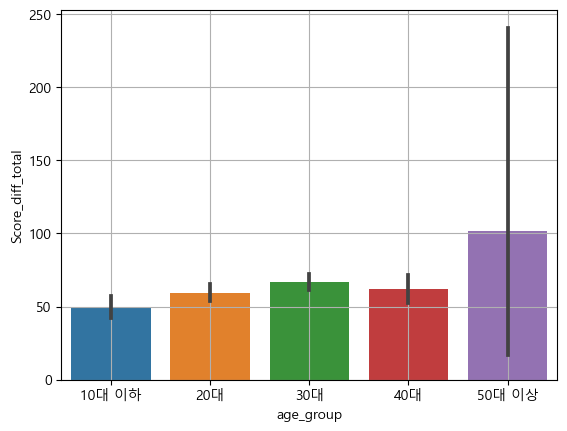

In [136]:
## barplot 시각화
## 코드 입력
sns.barplot(x = 'age_group', y = 'Score_diff_total', data = base_data)
plt.grid()
plt.show()

In [138]:
## 범주 데이터 확인
## 코드 입력
target = 'Score_diff_total'
feature = 'age_group'

d1 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[0], target]
d2 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[1], target]
d3 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[2], target]
d4 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[3], target]
d5 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[4], target]

In [139]:
## 분산 분석 : f_oneway
## 코드 입력
spst.f_oneway(d1, d2, d3, d4, d5)

F_onewayResult(statistic=3.1891226861653696, pvalue=0.01328836559678377)

#### &nbsp;&nbsp; 4-2) 1,2회차 점수 차이 정보 추가 및 데이터 분석

* **세부요구사항**
    - 1,2회차 점수 차이 ( 2회차 점수 - 1회차 점수)를 구하여 **열(Score_diff_total_2_1)**을 추가하세요.
    - 1,2회차 점수 차이 데이터 특성에 맞는 단변량, 이변량 분석을 하세요.

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-2-1) 1,2회 점수 차 (Score_diff_total_2_1) 열 추가

In [140]:
## 'Score_diff_total_2_1' = '2nd_Total_Score' - '1st_Total_Score'
## 코드 입력
base_data['Score_diff_total_2_1'] = base_data['2nd_Total_Score'] - base_data['1st_Total_Score']

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-2-2) Score_diff_total_2_1 단변량 분석

,count,mean,std,min,25%,50%,75%,max
Score_diff_total_2_1,500.0,49.584,38.467993,2.0,10.0,50.0,74.0,266.0


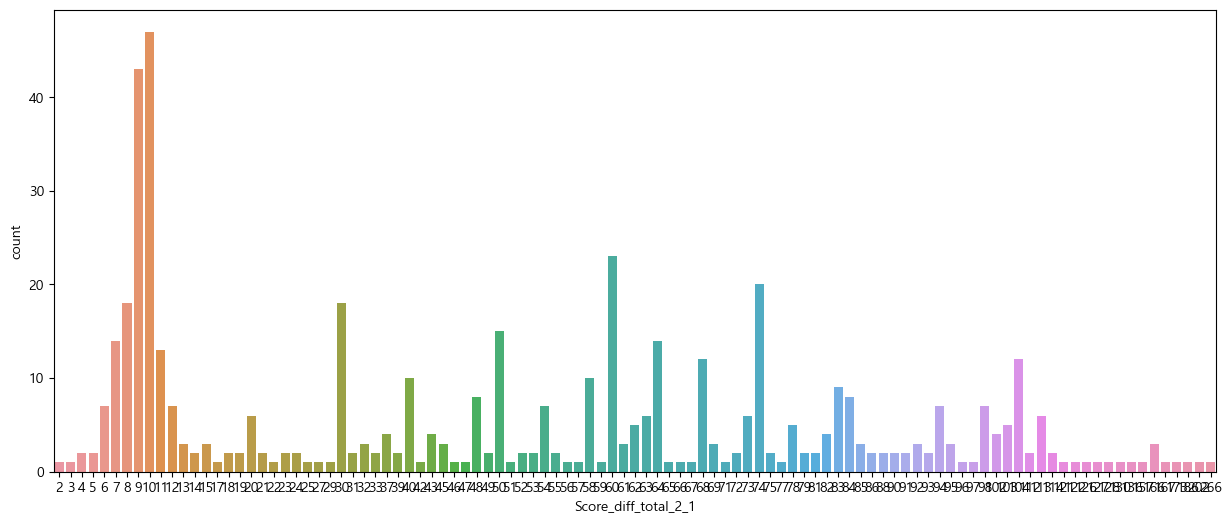

In [166]:
## Score_diff_total_2_1 데이터의 기초 통계량 확인
## 코드 입력
target = 'Score_diff_total'
feature = 'Score_diff_total_2_1'

display(base_data[[feature]].describe().T)

## Score_diff_total_2_1  데이터 분포 시각화 확인
## 코드 입력
plt.figure(figsize=(15,6))
sns.countplot(x=feature, data=base_data)
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-2-3) Score_diff_2_1 -> Target 이변량 분석

PearsonRResult(statistic=-0.03520537767595357, pvalue=0.4321666918578589)

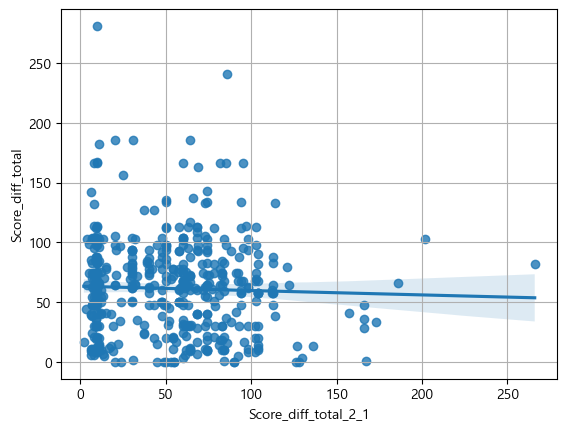

In [167]:
## 상관분석 (pearsonr)
## 코드 입력
display(spst.pearsonr(base_data[feature], base_data[target]))
## regplot으로 시각화
## 코드 입력
sns.regplot(x = feature, y = target, data = base_data)
plt.grid()
plt.show()

#### &nbsp;&nbsp; 4-3) 추가하고 싶은 정보를 생성하고, 이에 대한 단변량/이변량 분석을 수행

In [152]:
## 1st_Total_Score의 구간대 별 점수 향상

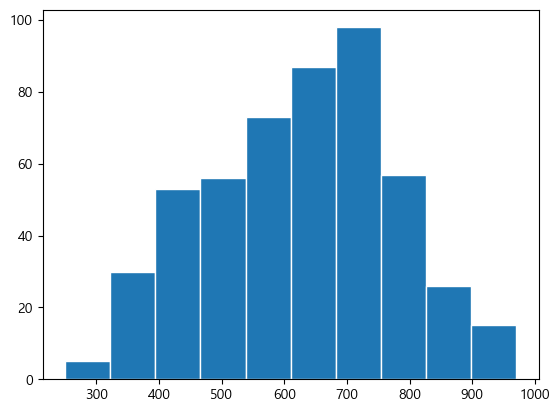

In [165]:
## 열(데이터) 추가
## 코드 입력
plt.hist(x = base_data['1st_Total_Score'], edgecolor = 'w')
plt.show()

In [162]:
bins = [-np.inf, 299, 399, 499, 599, 699, 799, np.inf]

## labels: 각 구간에 붙일 라벨
## 코드 입력
labels = ['300점 미만', '300점 대', '400점 대', '500점 대', '600점 대', '700점 대', '800점 이상']

## cut 함수 사용
## 코드 입력
base_data['1st_score_group'] = pd.cut(base_data['1st_Total_Score'],bins=bins,labels=labels)

## 데이터 확인
base_data.head()

,ID,Gender,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,...,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total,age,age_group,Score_diff_total_2_1,1st_score_group
0,1,M,1973,345,336,681,승진,온라인강의,영상 교재,주5-6회,...,173,354,227,213,440,241,50,50대 이상,86,300점 대
1,2,F,1982,380,368,748,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,...,290,620,354,339,693,55,41,40대,73,600점 대
2,3,F,1995,416,382,798,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주1-2회,...,309,676,396,365,761,37,28,20대,85,600점 대
3,4,M,1987,495,397,892,승진,온라인강의,뉴스/이슈 기반 교재,주3-4회,...,285,755,495,341,836,56,36,30대,81,700점 대
4,5,M,1994,398,437,835,자기계발,온라인강의,영상 교재,주3-4회,...,372,645,314,426,740,95,29,20대,95,600점 대


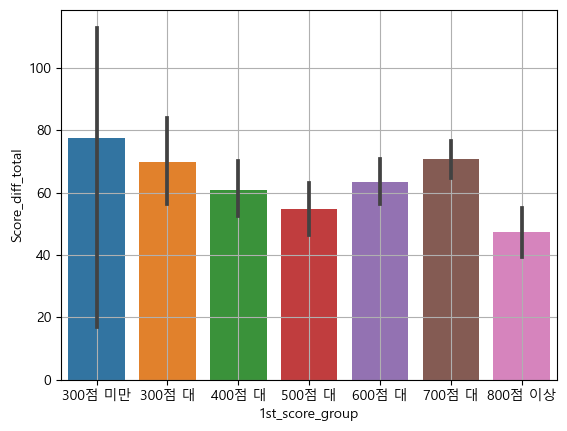

In [163]:
sns.barplot(x = '1st_score_group', y = 'Score_diff_total', data = base_data)
plt.grid()
plt.show()

In [164]:
target = 'Score_diff_total'
feature = '1st_score_group'

d1 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[0], target]
d2 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[1], target]
d3 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[2], target]
d4 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[3], target]
d5 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[4], target]
d6 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[5], target]
d7 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[6], target]

spst.f_oneway(d1, d2, d3, d4, d5, d6, d7)

F_onewayResult(statistic=3.221971454973718, pvalue=0.004098264050357915)

## [정리] 3가지 추가 feature를 통해 파악된 비즈니스 인사이트는 무엇인가요?

In [ ]:
# 셋 모두 유의미한 상관관계를 갖지는 않는다
# 첫 시험의 점수 대와 점수 상승량에 대한 상관관계를 살펴보았으나 유의미한 상관관계를 갖지 않는다.

## <font color="green"> **Mission Clear** </font> &nbsp; &nbsp; 수고하셨습니다!!